In [29]:
!git clone https://github.com/Savyaraj/2025.git
%cd 2025

Cloning into '2025'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 80 (delta 14), reused 9 (delta 9), pack-reused 56 (from 1)
Receiving objects: 100% (80/80), 23.11 MiB | 18.36 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/2025/2025


## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary:

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [30]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = '/content/2025/Exercises/01 - Handling data/Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

!head "$HAPPINESS_DATASET"

country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
Afghanistan,2.566900015,0.470366955,52.59000015,0.39657300700000003,-0.0964294,0.9336865540000001,South Asia
Albania,4.882699966000001,0.671070457,68.70813751,0.7819942240000001,-0.042309489000000006,0.896303713,Central and Eastern Europe
Algeria,5.005099773,0.8033851390000001,65.90517426,0.46661090899999996,-0.121105164,0.7354851370000001,Middle East and North Africa
Argentina,5.974699974,0.900567949,68.80380249,0.831132412,-0.194913864,0.8420098420000001,Latin America and Caribbean
Armenia,4.676799774,0.7574794290000001,66.75065613,0.7120178340000001,-0.13877961,0.7735447879999999,Commonwealth of Independent States
Australia,7.222799778,0.9448546170000001,73.60453796,0.915431738,0.19046016,0.41516912,North America and ANZ
Austria,7.294199944,0.9280458690000001,73.00250244,0.899989486,0.085429221,0.49995487899999996,Western Europe
Azerbaijan,5.164800167,0.

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [31]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)

print("First few rows of happiness DataFrame:")
display(happiness.head())

print("\nData format of happiness DataFrame:")
happiness.info()

print("\nFirst few rows of countries DataFrame:")
display(countries.head())

print("\nData format of countries DataFrame:")
countries.info()

First few rows of happiness DataFrame:


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States



Data format of happiness DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   135 non-null    object 
 1   happiness_score           135 non-null    float64
 2   social_support            135 non-null    float64
 3   healthy_life_expectancy   135 non-null    float64
 4   freedom_of_choices        135 non-null    float64
 5   generosity                135 non-null    float64
 6   perception_of_corruption  135 non-null    float64
 7   world_region              135 non-null    object 
dtypes: float64(6), object(2)
memory usage: 8.6+ KB

First few rows of countries DataFrame:


,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"



Data format of countries DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  135 non-null    object
 1   area          135 non-null    int64 
 2   population    135 non-null    int64 
 3   literacy      133 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.3+ KB


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [32]:
# Write your code here
countries['country_name'] = countries['country_name'].str.title()
country_features = pd.merge(happiness, countries, left_on='country', right_on='country_name', how='inner')

print("First few rows of the merged country_features DataFrame:")
display(country_features.head())

First few rows of the merged country_features DataFrame:


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,Afghanistan,647500,31056997,"36,0"
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,Albania,28748,3581655,"86,5"
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,Algeria,2381740,32930091,"70,0"
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,Argentina,2766890,39921833,"97,1"
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,Armenia,29800,2976372,"98,6"


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [33]:
# Write your code here
top_10_happy_countries = country_features.sort_values(by='happiness_score', ascending=False).head(10)
print("Top 10 countries based on happiness score:")
display(top_10_happy_countries[['country', 'happiness_score']])

Top 10 countries based on happiness score:


,country,happiness_score
38,Finland,7.8087
31,Denmark,7.6456
115,Switzerland,7.5599
50,Iceland,7.5045
92,Norway,7.4880
87,Netherlands,7.4489
114,Sweden,7.3535
88,New Zealand,7.2996
6,Austria,7.2942
72,Luxembourg,7.2375


We are interested to know in what world region people are happier.

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [34]:
# Write your code here
average_happiness_by_region = country_features.groupby('world_region')['happiness_score'].mean()
number_of_countries_by_region = country_features.groupby('world_region').size()

region_happiness = pd.DataFrame({
    'average_happiness_score': average_happiness_by_region,
    'number_of_countries': number_of_countries_by_region
})

region_happiness = region_happiness.sort_values(by='average_happiness_score', ascending=False)

print("Average happiness score and number of countries by world region:")
display(region_happiness)

Average happiness score and number of countries by world region:


,average_happiness_score,number_of_countries
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [35]:
# Write your code here
north_america_anz_countries = country_features[country_features['world_region'] == 'North America and ANZ']
print("Countries in North America and ANZ region and their happiness scores:")
display(north_america_anz_countries[['country', 'happiness_score']])

Countries in North America and ANZ region and their happiness scores:


,country,happiness_score
5,Australia,7.2228
21,Canada,7.2321
88,New Zealand,7.2996
127,United States,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%.

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [36]:
# Write your code here
literacy_100 = country_features[country_features['literacy'] == '100,0']

print("Countries with 100% literacy:")
for index, row in literacy_100.iterrows():
    print(f"{row['world_region']} - {row['country']} ({row['happiness_score']})")

Countries with 100% literacy:
North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.487999916000001)


What is the global average?

In [37]:
# Write your code here
country_features['literacy'] = country_features['literacy'].str.replace(',', '.').astype(float)
global_average_literacy = country_features['literacy'].mean()
print(f"The global average literacy is: {global_average_literacy:.2f}%")

The global average literacy is: 81.85%


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [38]:
# Write your code here
low_literacy_countries_count = country_features[country_features['literacy'] < 50].shape[0]
total_countries_count = country_features.shape[0]
proportion_low_literacy = (low_literacy_countries_count / total_countries_count) * 100

print(f"Proportion of countries with literacy below 50%: {proportion_low_literacy:.2f}%")

Proportion of countries with literacy below 50%: 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [39]:
# Write your code here
country_features['illiterate_population'] = country_features['population'] * (100 - country_features['literacy']) / 100
total_illiterate_population = country_features['illiterate_population'].sum()
total_world_population = country_features['population'].sum()
percentage_illiterate_population = (total_illiterate_population / total_world_population) * 100

print(f"Raw number of illiterate people in the world: {total_illiterate_population:,.0f}")
print(f"Percentage of world population that is illiterate: {percentage_illiterate_population:.2f}%")

Raw number of illiterate people in the world: 1,249,372,988
Percentage of world population that is illiterate: 20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [40]:
# Write your code here
country_features['population_density'] = country_features['population'] / country_features['area']
display(country_features.head())

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy,illiterate_population,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,Afghanistan,647500,31056997,36.0,1.987648e+07,47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,Albania,28748,3581655,86.5,4.835234e+05,124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,Algeria,2381740,32930091,70.0,9.879027e+06,13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,Argentina,2766890,39921833,97.1,1.157733e+06,14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,Armenia,29800,2976372,98.6,4.166921e+04,99.878255


What is the happiness score of the 3 countries with the lowest population density?

In [41]:
# Write your code here
lowest_density_countries = country_features.sort_values(by='population_density').head(3)
print("Happiness score of the 3 countries with the lowest population density:")
display(lowest_density_countries[['country', 'population_density', 'happiness_score']])

Happiness score of the 3 countries with the lowest population density:


,country,population_density,happiness_score
83,Mongolia,1.810751,5.4562
5,Australia,2.636201,7.2228
14,Botswana,2.731371,3.4789


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

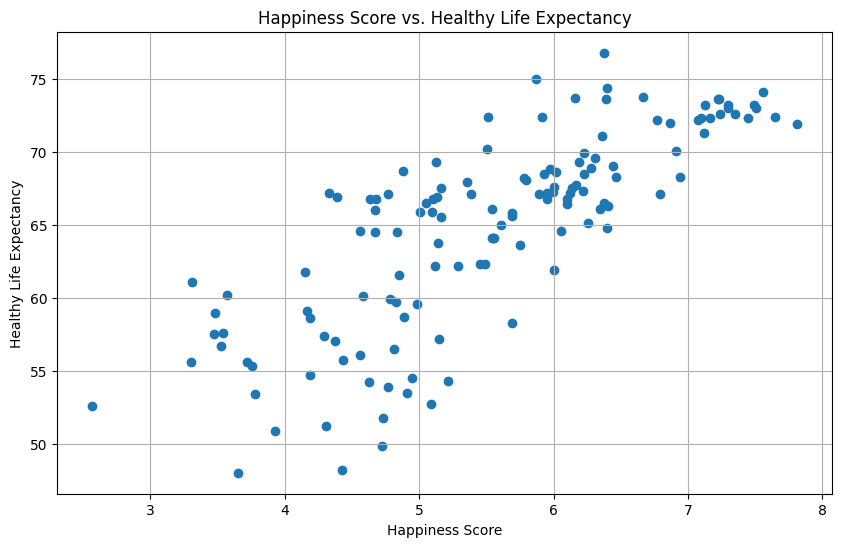

In [42]:
# Write your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(country_features['happiness_score'], country_features['healthy_life_expectancy'])
plt.xlabel('Happiness Score')
plt.ylabel('Healthy Life Expectancy')
plt.title('Happiness Score vs. Healthy Life Expectancy')
plt.grid(True)
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.